# Projeto Iris — Classificação de Flores

**Objetivo:** Criar, treinar e avaliar modelos de classificação utilizando o dataset Iris.
Exploraremos Regressão Logística, KNN e SVM, comparando seus desempenhos.

In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Carregando o Dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
df = X.copy()
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Pré-processamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

In [5]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

In [6]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [7]:
# Comparando Precisões
print("Acurácia Regressão Logística:", acc_logreg)
print("Acurácia KNN:", acc_knn)
print("Acurácia SVM:", acc_svm)

Acurácia Regressão Logística: 1.0
Acurácia KNN: 1.0
Acurácia SVM: 0.9666666666666667


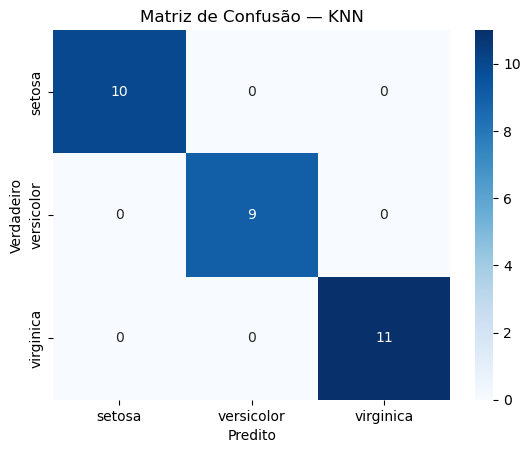

In [8]:
# Matriz de Confusão — KNN
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão — KNN")
plt.show()

In [9]:
# Classificação e Interpretação
report = classification_report(y_test, y_pred_knn, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Conclusão:**
- KNN, Regressão Logística e SVM apresentam bons resultados com este dataset.
- Pequenas diferenças na acurácia podem surgir dependendo da normalização e dos parâmetros do modelo.
- Este notebook mostra pré-processamento, treino, avaliação e interpretação.